***
____
![revit](https://i.ibb.co/bQ3dB8C/curso-revit.png)

***
***


# Clase 03
## Cuadratura y procesado de datos


### Detalles del dataset

El hundimiento del **Titanic** es uno de los naufragios más infames de la historia. El 15 de abril de 1912, durante su viaje inaugural, el Titanic se hundió después de chocar con un iceberg, matando a 1502 de 2224 pasajeros y tripulantes. Esta tragedia sensacional conmocionó a la comunidad internacional y condujo a mejores regulaciones de seguridad para los buques.

Una de las razones por las que el naufragio llevó a tal pérdida de vidas fue que no había suficientes botes salvavidas para los pasajeros y la tripulación. Aunque hubo algún elemento de suerte involucrado en sobrevivir al hundimiento, algunos grupos de personas tenían más probabilidades de sobrevivir que otros, como las mujeres, los niños y la clase alta.

Por lo cual nuestro análisis busca identificar qué tipo de personas podrían haber sobrevivido a la tragedia.

### Diccionario de datos

Variable target
- survived: 0 = No, 1 = Sí 
- pclass: Clase de boleto 1 = 1er, 2 = 2do, 3 = 3er 
- sex: Sexo 
- age: Edad en años 
- sibsp: # de hermanos, hermanas o conyuges a bordo del Titanic 
- parch: # de padres o hijos a bordo del Titanic 
- ticket: Numeración del ticket 
- fare: tarifa del pasaje
- cabin: número de cabina
- embarked: puerto de embarque C = Cherbourg, Q = Queenstown, S = Southampton
- boat: código del bote de sobrevivencia
- body: Numeración del cuerpo encontrado
- home.dest: Destino

### Carga de datos

Empezamos, como siempre, con la carga de las librerías que usaremos

In [1]:
import numpy as np
import pandas as pd

Ubicamos la carpeta donde estarpan nuestros archivos

In [2]:
carpeta = "/Users/Alfy/Desktop/REVIT_DATASCIENCE_PYTHON/DATA_SCIENCE_PYTHON/Clase_03/Limpieza_datos/titanic/"

Concatenamos la carpeta con el nombre del archivo

In [5]:
# Cargamos CSV
archivo = "titanic.csv"
fullpath = carpeta + archivo

In [6]:
df = pd.read_csv(fullpath)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### Cuadratura

Lo primero siempre es saber: la forma, las variables los tipos y los descriptivos

In [5]:
# Verificar si coincide con la cantidad de registros y variables enviadas
df.shape

(1312, 14)

In [6]:
# Verificar si las variables son las solicitadas
df.columns.values

array(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype=object)

In [7]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1312.000000,1312.000000,1049.000000,1312.000000,1312.000000,1311.000000,124.000000
mean,2.293445,0.381098,29.878138,0.499238,0.387195,33.455997,161.548387
std,0.838629,0.485842,14.393234,1.040741,0.866930,51.910188,97.410818
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,74.250000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,154.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.500000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [8]:
df.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

Verificamos los totales y/o promedios de alguna variable

In [9]:
df["age"].sum()

31342.1667

In [10]:
df.age.mean()

29.878137940896092

### Renombrar variables

Muchas veces es necesario renombrar la variables (columnas) con valores que intuitivamente nos den una idea de que se tratan.

In [9]:
df = df.rename(columns={
    'pclass':'clase', 
    'survived':'sobreviviente',
    'name':'nombre', 
    'sex':'sexo', 
    'age':'edad', 
    'sibsp':'hos_has_cony', 
    'parch':'pad_hij', 
    'ticket':'ticket',
    'fare':'tarifa', 
    'cabin':'cabina', 
    'embarked':'embarque', 
    'boat':'bote', 
    'body':'cuerpo', 
    'home.dest':'destino'
})

In [12]:
df.head(6)

,clase,sobreviviente,nombre,sexo,edad,hos_has_cony,pad_hij,ticket,tarifa,cabina,embarque,bote,cuerpo,destino
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"


### Duplicados

En este apartado se intentan ver dos cosas:

- Asegurarse de que datos que no debieran estar duplicados no lo están (por ejemplo, ids o llaves primarias)
- Revisar si hay columnas que tengan un alto numero de duplicados, ya que pueden no aportar mucha informacion (varianza cercana a cero)

In [13]:
df.nombre.value_counts()

Allison, Mr. Hudson Joshua Creighton         3
Zakarian, Mr. Mapriededer                    2
Kelly, Mr. James                             2
Connolly, Miss. Kate                         2
Wiseman, Mr. Phillippe                       1
Carrau, Mr. Jose Pedro                       1
Carrau, Mr. Francisco M                      1
Albimona, Mr. Nassef Cassem                  1
Novel, Mr. Mansouer                          1
Bjorklund, Mr. Ernst Herbert                 1
Abelson, Mr. Samuel                          1
Goodwin, Miss. Lillian Amy                   1
Ling, Mr. Lee                                1
Alhomaki, Mr. Ilmari Rudolf                  1
Renouf, Mr. Peter Henry                      1
Linehan, Mr. Michael                         1
Andrews, Miss. Kornelia Theodosia            1
Nasr, Mr. Mustafa                            1
Asplund, Master. Carl Edgar                  1
Dahlberg, Miss. Gerda Ulrika                 1
Rugg, Miss. Emily                            1
Giles, Mr. Fr

In [ ]:
df[df.nombre ==]

In [13]:
df[df.nombre == 'Kelly, Mr. James']

,clase,sobreviviente,nombre,sexo,edad,hos_has_cony,pad_hij,ticket,tarifa,cabina,embarque,bote,cuerpo,destino
924,3,0,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN,70.0,NaN
925,3,0,"Kelly, Mr. James",male,44.0,0,0,363592,8.0500,NaN,S,NaN,NaN,NaN


In [14]:
df[df.nombre == 'Allison, Mr. Hudson Joshua Creighton']

,clase,sobreviviente,nombre,sexo,edad,hos_has_cony,pad_hij,ticket,tarifa,cabina,embarque,bote,cuerpo,destino
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,113781,151.55,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
1309,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,113781,151.55,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
1310,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,113781,151.55,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"


Parece que nuestro data set no tiene valores duplicados. 

In [15]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1282    False
1283    False
1284    False
1285    False
1286    False
1287    False
1288    False
1289    False
1290    False
1291    False
1292    False
1293    False
1294    False
1295    False
1296    False
1297    False
1298    False
1299    False
1300    False
1301    False
1302    False
1303    False
1304    False
1305    False
1306    False
1307    False
1308    False
1309     True
1310     True
1311     True
Length: 1312, dtype: bool

In [16]:
df[df.duplicated()]

,clase,sobreviviente,nombre,sexo,edad,hos_has_cony,pad_hij,ticket,tarifa,cabina,embarque,bote,cuerpo,destino
1309,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,113781,151.550,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
1310,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,113781,151.550,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
1311,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.225,NaN,C,NaN,304.0,NaN


Observamos que si tenemos valores duplicados, por lo cual la mejor opción es retirarlos 

In [17]:
df = df.drop_duplicates()
df.shape

(1309, 14)

In [18]:
len(df)

1309

In [16]:
df.edad.value_counts()

24.0000    47
22.0000    43
30.0000    42
21.0000    41
18.0000    39
25.0000    34
28.0000    32
36.0000    31
27.0000    30
29.0000    30
26.0000    30
19.0000    29
23.0000    26
32.0000    24
20.0000    23
35.0000    23
31.0000    23
45.0000    21
33.0000    21
17.0000    20
39.0000    20
16.0000    19
40.0000    18
42.0000    18
34.0000    16
50.0000    15
47.0000    14
48.0000    14
38.0000    14
2.0000     12
           ..
28.5000     3
18.5000     3
12.0000     3
71.0000     2
45.5000     2
36.5000     2
34.5000     2
14.5000     2
0.9167      2
30.5000     2
70.0000     2
26.5000     2
24.5000     1
20.5000     1
0.4167      1
60.5000     1
23.5000     1
22.5000     1
38.5000     1
66.0000     1
74.0000     1
55.5000     1
0.1667      1
0.3333      1
80.0000     1
11.5000     1
67.0000     1
70.5000     1
76.0000     1
0.6667      1
Name: edad, Length: 98, dtype: int64

In [22]:
aux = df.edad.value_counts()
aux

24.0000    47
22.0000    43
30.0000    42
21.0000    41
18.0000    39
25.0000    34
28.0000    32
36.0000    31
27.0000    30
29.0000    30
26.0000    30
19.0000    29
23.0000    26
32.0000    24
20.0000    23
35.0000    23
31.0000    23
45.0000    21
33.0000    21
17.0000    20
39.0000    20
16.0000    19
40.0000    18
42.0000    18
34.0000    16
50.0000    15
47.0000    14
48.0000    14
38.0000    14
2.0000     12
           ..
28.5000     3
18.5000     3
12.0000     3
71.0000     2
45.5000     2
36.5000     2
34.5000     2
14.5000     2
0.9167      2
30.5000     2
70.0000     2
26.5000     2
24.5000     1
20.5000     1
0.4167      1
60.5000     1
23.5000     1
22.5000     1
38.5000     1
66.0000     1
74.0000     1
55.5000     1
0.1667      1
0.3333      1
80.0000     1
11.5000     1
67.0000     1
70.5000     1
76.0000     1
0.6667      1
Name: edad, Length: 98, dtype: int64

In [24]:
aux.iloc[-1]

1

In [21]:
df['edad'].name

'edad'

In [22]:
nro = len(df)
def valores_duplicados_col(df):
    for columna in df:
        n_por_valor = df[columna].value_counts()
        mas_comun = n_por_valor.iloc[0]
        menos_comun = n_por_valor.iloc[-1]
        print("{} | {}-{} | {}".format(
            df[columna].name,
            round(mas_comun / (1.0*nro),3),
            round(menos_comun / (1.0*nro),3),
            df[columna].dtype
        ))

valores_duplicados_col(df)

clase | 0.542-0.212 | int64
sobreviviente | 0.618-0.382 | int64
nombre | 0.002-0.001 | object
sexo | 0.644-0.356 | object
edad | 0.036-0.001 | float64
hos_has_cony | 0.681-0.005 | int64
pad_hij | 0.765-0.002 | int64
ticket | 0.008-0.001 | object
tarifa | 0.046-0.001 | float64
cabina | 0.005-0.001 | object
embarque | 0.698-0.094 | object
bote | 0.03-0.001 | object
cuerpo | 0.001-0.001 | float64
destino | 0.049-0.001 | object


In [23]:
df.pad_hij.value_counts(normalize=True)

0    0.765470
1    0.129870
2    0.086325
3    0.006112
5    0.004584
4    0.004584
9    0.001528
6    0.001528
Name: pad_hij, dtype: float64

Existen variables con valores que se repiten por encima del 70%, nos toca revisar si eso tiene sentidoo no en el caso que estamos analizando

Si quisieramos eliminar una variable, la función **del** es muy útil.

In [25]:
del df["cuerpo"]

In [26]:
df.head()

,clase,sobreviviente,nombre,sexo,edad,hos_has_cony,pad_hij,ticket,tarifa,cabina,embarque,bote,destino
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"


## Valores perdidos (missing)

In [27]:
df.head()

,clase,sobreviviente,nombre,sexo,edad,hos_has_cony,pad_hij,ticket,tarifa,cabina,embarque,bote,destino
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"


In [28]:
pd.isnull(df["bote"])

0       False
1       False
2        True
3        True
4        True
5       False
6       False
7        True
8       False
9        True
10       True
11      False
12      False
13      False
14      False
15       True
16       True
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25       True
26      False
27      False
28      False
29      False
        ...  
1282     True
1283     True
1284     True
1285     True
1286    False
1287     True
1288     True
1289     True
1290     True
1291     True
1292     True
1293     True
1294     True
1295     True
1296     True
1297     True
1298     True
1299    False
1300     True
1301     True
1302     True
1303     True
1304     True
1305     True
1306     True
1307     True
1308     True
1309     True
1310     True
1311     True
Name: bote, Length: 1312, dtype: bool

In [29]:
pd.notnull(df["bote"])

0        True
1        True
2       False
3       False
4       False
5        True
6        True
7       False
8        True
9       False
10      False
11       True
12       True
13       True
14       True
15      False
16      False
17       True
18       True
19       True
20       True
21       True
22       True
23       True
24       True
25      False
26       True
27       True
28       True
29       True
        ...  
1282    False
1283    False
1284    False
1285    False
1286     True
1287    False
1288    False
1289    False
1290    False
1291    False
1292    False
1293    False
1294    False
1295    False
1296    False
1297    False
1298    False
1299     True
1300    False
1301    False
1302    False
1303    False
1304    False
1305    False
1306    False
1307    False
1308    False
1309    False
1310    False
1311    False
Name: bote, Length: 1312, dtype: bool

In [30]:
pd.isnull(df["bote"]).sum()

826

La existencia de datos faltantes o perdidos básicamente se da por dos razones:
* En la extracción (omisión)
* En la recolección o generación 

Podemos hacer el análisis para todas las variables juntas.

In [31]:
df.describe()

,clase,sobreviviente,edad,hos_has_cony,pad_hij,tarifa
count,1312.000000,1312.000000,1049.000000,1312.000000,1312.000000,1311.000000
mean,2.293445,0.381098,29.878138,0.499238,0.387195,33.455997
std,0.838629,0.485842,14.393234,1.040741,0.866930,51.910188
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


In [29]:
nro = len(df)
def valores_inexistentes_col(df):
    for columna in df:
        print("{} | {} | {}".format(
            df[columna].name, round(len(df[df[columna].isnull()]) / (1.0*nro),3), df[columna].dtype
        ))

valores_inexistentes_col(df)

clase | 0.0 | int64
sobreviviente | 0.0 | int64
nombre | 0.0 | object
sexo | 0.0 | object
edad | 0.201 | float64
hos_has_cony | 0.0 | int64
pad_hij | 0.0 | int64
ticket | 0.0 | object
tarifa | 0.001 | float64
cabina | 0.775 | object
embarque | 0.002 | object
bote | 0.629 | object
destino | 0.431 | object


Aquellas variables con gran cantidad de nulos suelen retirarse del análisis dado que no aportan información útil. Una alternativa es convertir la existencia o no de cierta variable en una variable **dummy**

### ¿Qué hacemos con esos datos faltantes?

#### Borramos los missing

In [30]:
df["flag"] = 1

In [31]:
df.head()

,clase,sobreviviente,nombre,sexo,edad,hos_has_cony,pad_hij,ticket,tarifa,cabina,embarque,bote,destino,flag
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,"St Louis, MO",1
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON",1
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON",1
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON",1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON",1


In [32]:
df = df.drop(["flag"], axis = 1)

In [33]:
df.head()

,clase,sobreviviente,nombre,sexo,edad,hos_has_cony,pad_hij,ticket,tarifa,cabina,embarque,bote,destino
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"


In [36]:
df3 = df.dropna(axis = 1, how = "any")

In [37]:
df3.shape

(1309, 7)

In [38]:
df.shape

(1309, 13)

#### Imputamos los missing

In [39]:
# Rellenamos los NA con 0
df4 = df.copy()
df4 = df4.fillna(0)

In [40]:
df4.head()

,clase,sobreviviente,nombre,sexo,edad,hos_has_cony,pad_hij,ticket,tarifa,cabina,embarque,bote,destino
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0,"Montreal, PQ / Chesterville, ON"


In [41]:
df.head()

,clase,sobreviviente,nombre,sexo,edad,hos_has_cony,pad_hij,ticket,tarifa,cabina,embarque,bote,destino
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"


In [42]:
df5 = df.copy()
type(df5)

pandas.core.frame.DataFrame

In [44]:
df5["bote"] = df5["bote"].fillna(0)
df5["destino"] = df5["destino"].fillna("Desconocido")

In [45]:
df5.tail(10)

,clase,sobreviviente,nombre,sexo,edad,hos_has_cony,pad_hij,ticket,tarifa,cabina,embarque,bote,destino
1299,3,0,"Yasbeck, Mr. Antoni",male,27.0,1,0,2659,14.4542,NaN,C,C,Desconocido
1300,3,1,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,2659,14.4542,NaN,C,0,Desconocido
1301,3,0,"Youseff, Mr. Gerious",male,45.5,0,0,2628,7.2250,NaN,C,0,Desconocido
1302,3,0,"Yousif, Mr. Wazli",male,NaN,0,0,2647,7.2250,NaN,C,0,Desconocido
1303,3,0,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C,0,Desconocido
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,0,Desconocido
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,0,Desconocido
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,0,Desconocido
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,0,Desconocido
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,0,Desconocido


In [46]:
df.tail(10)

,clase,sobreviviente,nombre,sexo,edad,hos_has_cony,pad_hij,ticket,tarifa,cabina,embarque,bote,destino
1299,3,0,"Yasbeck, Mr. Antoni",male,27.0,1,0,2659,14.4542,NaN,C,C,NaN
1300,3,1,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1,0,2659,14.4542,NaN,C,NaN,NaN
1301,3,0,"Youseff, Mr. Gerious",male,45.5,0,0,2628,7.2250,NaN,C,NaN,NaN
1302,3,0,"Yousif, Mr. Wazli",male,NaN,0,0,2647,7.2250,NaN,C,NaN,NaN
1303,3,0,"Yousseff, Mr. Gerious",male,NaN,0,0,2627,14.4583,NaN,C,NaN,NaN
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.2250,NaN,C,NaN,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.2250,NaN,C,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.8750,NaN,S,NaN,NaN


In [48]:
pd.isnull(df5["edad"]).sum()

263

In [49]:
df5["edad"] = df5["edad"].fillna(df5["edad"].mean())

In [50]:
pd.isnull(df5["edad"]).sum()

0

In [51]:
# Probar los métodos ffill y backfill
fillna(method = "ffill")

NameError: name 'fillna' is not defined

### Variables dummys 

Usamos la variable sex del data set **"Titanic.csv"**, esta variable es categórica y la queremos trabajar como numérica o en su defecto es necesario queremos analizar la relación de un categoría con respecto a la otra.

In [52]:
df["sexo"].head()

0    female
1      male
2    female
3      male
4    female
Name: sexo, dtype: object

In [53]:
dummy_sex = pd.get_dummies(df["sexo"], prefix = "sexo")

In [54]:
dummy_sex.head()

,sexo_female,sexo_male
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0


In [55]:
# Quitamos la columna sex que no usaremos más
df = df.drop(["sexo"], axis = 1)

In [56]:
df.head()

,clase,sobreviviente,nombre,edad,hos_has_cony,pad_hij,ticket,tarifa,cabina,embarque,bote,destino
0,1,1,"Allen, Miss. Elisabeth Walton",29.0000,0,0,24160,211.3375,B5,S,2,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",0.9167,1,2,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",2.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",30.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"


In [57]:
# Concatenamos las dummies creadas con nuestro dataset original
pd.concat([df, dummy_sex], axis = 1)

,clase,sobreviviente,nombre,edad,hos_has_cony,pad_hij,ticket,tarifa,cabina,embarque,bote,destino,sexo_female,sexo_male
0,1,1,"Allen, Miss. Elisabeth Walton",29.0000,0,0,24160,211.3375,B5,S,2,"St Louis, MO",1,0
1,1,1,"Allison, Master. Hudson Trevor",0.9167,1,2,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON",0,1
2,1,0,"Allison, Miss. Helen Loraine",2.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON",1,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",30.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON",0,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON",1,0
5,1,1,"Anderson, Mr. Harry",48.0000,0,0,19952,26.5500,E12,S,3,"New York, NY",0,1
6,1,1,"Andrews, Miss. Kornelia Theodosia",63.0000,1,0,13502,77.9583,D7,S,10,"Hudson, NY",1,0
7,1,0,"Andrews, Mr. Thomas Jr",39.0000,0,0,112050,0.0000,A36,S,NaN,"Belfast, NI",0,1
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",53.0000,2,0,11769,51.4792,C101,S,D,"Bayside, Queens, NY",1,0
9,1,0,"Artagaveytia, Mr. Ramon",71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,"Montevideo, Uruguay",0,1


In [58]:
df.head()

,clase,sobreviviente,nombre,edad,hos_has_cony,pad_hij,ticket,tarifa,cabina,embarque,bote,destino
0,1,1,"Allen, Miss. Elisabeth Walton",29.0000,0,0,24160,211.3375,B5,S,2,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",0.9167,1,2,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",2.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",30.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON"


In [59]:
df = pd.concat([df, dummy_sex], axis = 1)

In [60]:
df.head()

,clase,sobreviviente,nombre,edad,hos_has_cony,pad_hij,ticket,tarifa,cabina,embarque,bote,destino,sexo_female,sexo_male
0,1,1,"Allen, Miss. Elisabeth Walton",29.0000,0,0,24160,211.3375,B5,S,2,"St Louis, MO",1,0
1,1,1,"Allison, Master. Hudson Trevor",0.9167,1,2,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON",0,1
2,1,0,"Allison, Miss. Helen Loraine",2.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON",1,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",30.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON",0,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0000,1,2,113781,151.5500,C22 C26,S,NaN,"Montreal, PQ / Chesterville, ON",1,0


In [61]:
# Ahora tratamos de hacer todo junto 
def crear_dummy (df, variable):
    dummy = pd.get_dummies(df[variable], prefix=variable)
    df = df.drop(variable, axis = 1)
    df = pd.concat([df, dummy], axis = 1)
    return df

In [63]:
crear_dummy(df4, "sexo")

,clase,sobreviviente,nombre,edad,hos_has_cony,pad_hij,ticket,tarifa,cabina,embarque,bote,destino,sexo_female,sexo_male
0,1,1,"Allen, Miss. Elisabeth Walton",29.0000,0,0,24160,211.3375,B5,S,2,"St Louis, MO",1,0
1,1,1,"Allison, Master. Hudson Trevor",0.9167,1,2,113781,151.5500,C22 C26,S,11,"Montreal, PQ / Chesterville, ON",0,1
2,1,0,"Allison, Miss. Helen Loraine",2.0000,1,2,113781,151.5500,C22 C26,S,0,"Montreal, PQ / Chesterville, ON",1,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",30.0000,1,2,113781,151.5500,C22 C26,S,0,"Montreal, PQ / Chesterville, ON",0,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0000,1,2,113781,151.5500,C22 C26,S,0,"Montreal, PQ / Chesterville, ON",1,0
5,1,1,"Anderson, Mr. Harry",48.0000,0,0,19952,26.5500,E12,S,3,"New York, NY",0,1
6,1,1,"Andrews, Miss. Kornelia Theodosia",63.0000,1,0,13502,77.9583,D7,S,10,"Hudson, NY",1,0
7,1,0,"Andrews, Mr. Thomas Jr",39.0000,0,0,112050,0.0000,A36,S,0,"Belfast, NI",0,1
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",53.0000,2,0,11769,51.4792,C101,S,D,"Bayside, Queens, NY",1,0
9,1,0,"Artagaveytia, Mr. Ramon",71.0000,0,0,PC 17609,49.5042,0,C,0,"Montevideo, Uruguay",0,1


### Valores fuera de rango (outliers)

Para detectar valores extremos una medida general es considerar outliers aquellos valores con una puntuación Z (z score) mayor de 3, esto es, que se alejan 3 veces o mas desviaciones standard de la media.

El z score se define como:

$$z(x)= \frac{x-\mu}{\sigma}$$

In [72]:
# Para este caso usaremos dos librerías no cargadas antes
from scipy import stats
import numpy as np

In [73]:
df = pd.read_csv(fullpath)

In [74]:
def outliers_col(df):
    for columna in df:
        if df[columna].dtype != np.object:
            n_outliers = len(df[np.abs(stats.zscore(df[columna])) > 3])    
            print("{} | {} | {}".format(
                df[columna].name,
                n_outliers,
                df[columna].dtype
        ))

outliers_col(df)

pclass | 0 | int64
survived | 0 | int64
age | 0 | float64
sibsp | 37 | int64
parch | 24 | int64
fare | 0 | float64
body | 0 | float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


Las variables *sibsp* y *parch* son las únicas que tienen valores fuera de rango

In [75]:
df.boxplot(column='sibsp')

Detalle del matplotlib, para imprimir en el notebook es necesario la siguiente línea de código. 

In [76]:
%matplotlib inline

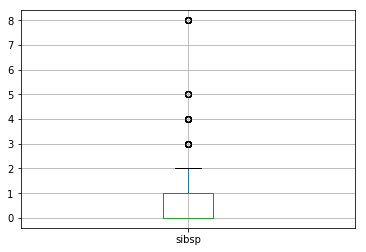

In [77]:
df.boxplot(column='sibsp')

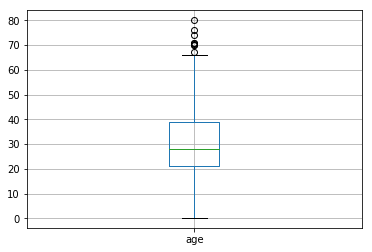

In [78]:
df.boxplot(column='age')

¿Qué pasó? no deberian haber ouliers.

Sucede que podemos definir más de una manera de trabajar con outliers. 
Sabemos que: IQR = Q(3) - Q(1)
- Los outliers para valores bajos estarán definidos por aquellos que son menores a Q(1) - 1.5IQR
- Los outliers para valores altos estarán definidos por aquellos que son mayores a Q(3) + 1.5IQR

### Normalizacion/Estandardizacion de variables

Hay dos formas en las cuales un dataset puede tener variables que haya que modificar pese a que no sean nulas/repetidas. 

Generalmente en un dataset las variables van a tener rangos muy distintos

In [91]:
df2 = df[["age", "fare"]]
df2.head()
df2 = df2.dropna(axis = 0, how = "any")

In [92]:
df2.describe()

,age,fare
count,1048.000000,1048.000000
mean,29.848919,36.877175
std,14.368946,55.885692
min,0.166700,0.000000
25%,21.000000,8.050000
50%,28.000000,15.800000
75%,39.000000,35.812500
max,80.000000,512.329200


Por ejemplo, vemos que la variable age tiene un rango de [0.16,80], mientras que la variable fare tiene un rango [0. 512.32]. Al aplicar ciertos tipos de modelos lo que va a pasar es que la variable fare va a tener mucho mas peso simplemente por que los valores que toma son más grandes.

De igual forma, hay variables donde la variación de los datos es muy grande, y esto hace que para ciertos modelos sea mas dificil el aprender reglas consistentes. 

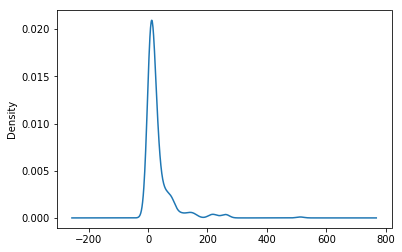

In [93]:
df2.fare.plot.kde()

In [94]:
from scipy import stats

In [96]:
stats.skew(df2.fare)

4.070599656866699

Hay dos técnicas principales para corregir estos dos tipos de problemas y mejorar nuestros modelos

**Normalización**

[Normalización](https://es.wikipedia.org/wiki/Normalizaci%C3%B3n_(estad%C3%ADstica)) (también llamada *min-max scaling*)

Normalización convierte una variable numérica con un rango cualquiera a un rango [0, 1]. Muchos modelos de `deep learning` exigen esto como requisito.

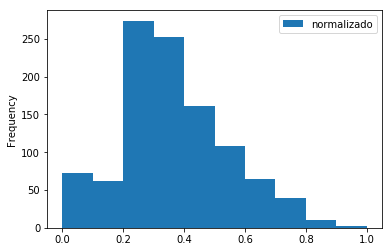

In [103]:
age_x_min = df2.age.min()
age_x_max = df2.age.max()

age_original = df2.age
age_normalizado = age_original.apply(lambda x: (x-age_x_min) / (age_x_max - age_x_min))

import matplotlib.pyplot as plt
age_normalizado.plot.hist(label="normalizado")
plt.legend();

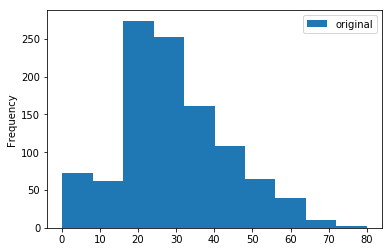

In [104]:
age_original.plot.hist(label="original")
plt.legend();

**Estandarización**

El objetivo de la estandardización es reescalar la variable a una distribución con media 0 y desviación estándar 1.

Muchos algoritmos necesitan que todas las variables tengan una distribución normal. De hecho, [la librería principal](http://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling) que vamos a usar para Machine Learning lo especifica en su documentación.

Estandarizar se puede realizar fácilmente convirtiendo cada valor a su puntuación Z, con la formula:

$$\frac{y-\mu}{\sigma}$$

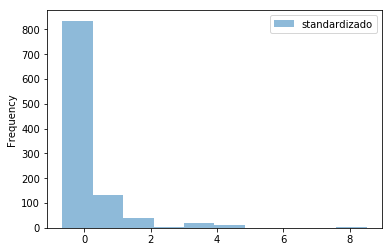

In [107]:
fare_mu = df2.fare.mean()
fare_sigma = df2.fare.std()

fare_estandarizado = fare_original.apply(lambda x: (x-fare_mu) / fare_sigma)

fare_estandarizado.plot.hist(label="standardizado", alpha=0.5)
plt.legend();

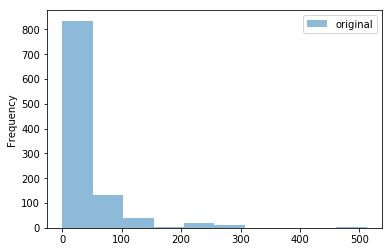

In [108]:
fare_original.plot.hist(label="original", alpha=0.5)
plt.legend();

En cuanto a cuando elegir normalización o estandarización, esta decisión está sujeta a debate.

Si los algoritmos que se desea usar requieren una estructura de los datos concreta, entonces no hay que tomar una decisión, simplemente seguir los requisitos de dicho algoritmo.

Un problema que tiene la normalización es que la distancia absoluta entre los valores del dataset al agruparlos todos en un grupo tan pequeño. Por lo tanto si los datos varían mucho es mejor probar a estandarizar primero en vez de normalizar. No obstante no es mala idea el probar ambos procesos y ver cual da mejores resultados.

In [ ]:
df2.to_csv("df_procesado.csv", index=False)

[Revit IT Consulting](https://www.revitgrp.com/)